# Bernsteinの不等式を説明していきます

----

##### bernsteinの不等式を示すと, $X_{1}$, $X_{2}$,...., $X_{n}$はそれぞれ独立な確率変数とします．各$X_{i}$のとりうる範囲は[a,b]とします．
##### 平均はμ, X = (X1 + X2 + ... + Xn)/n とすると,次の不等式が成り立ちます．
##### ${\epsilon}$は正の任意の定数とします．

$$\mathrm{P} \left( \left\vert X - \mu \right\vert \geq \epsilon \right) \leq 2 \exp \left( -\frac{n\epsilon^2}{2\sigma^2 + \frac{2}{3}(b-a)\epsilon} \right)$$

##### ${\sigma^2}$ は分散で, 平均は0とします．

---

### まずは今回使う確率密度関数を表します．
##### 標準正規分布とします．

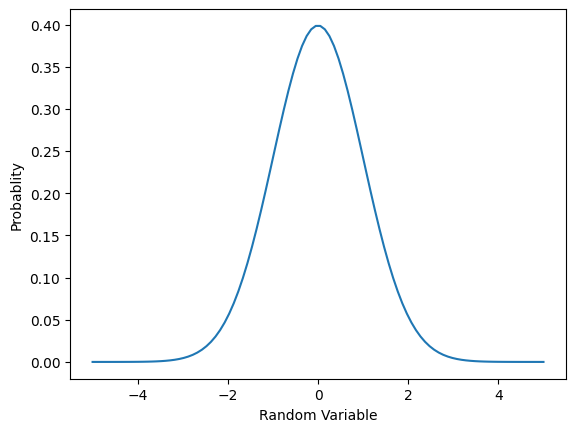

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
#確率変数のとりうる範囲
x = np.linspace(-5.0,5.0,100)

#正規分布
y =norm.pdf(x,0,1)
plt.xlabel('Random Variable')
plt.ylabel('Probablity')
plt.plot(x,y)

##### 左辺の意味は/notebooks/hoeffding_inequalityで確認してください

---

##### 次にbernsteinの不等式の右辺の関数を定義します．

In [33]:
def bernstein_inequality_bound(n: int, a: float, b: float, epsilon: float):
    #今回は分散が1の場合を考えています
    return 2 * np.exp((-n * epsilon **2)/ (2 + 2/3 * (b-a) * epsilon))

In [34]:
def bernstein_inequality(epsilon: float,a :float,b: float,n = 100):
    #どの確率変数がイプシロンより大きくなるかを確認するindex
    dif_index = 0
    for i in range(100):
        if x[i] >= epsilon:
            dif_index = i
            break
    #絶対値ついてるから2倍，標準正規分布は0を基準に対象なので．
    left_bound = 2 * (1-y[i])
    right_bound = bernstein_inequality_bound(n,a,b,epsilon)
    
    if left_bound <= right_bound:
        print('Bernsteinの不等式は成立してます')

In [35]:
bernstein_inequality(epsilon=0.001,a = -5.0,b = 5.0,n = 100)

Bernsteinの不等式は成立してます


----

##### ちなみに全く同じ条件でHoeffdingの不等式で出した右辺の値は，1.999996000004, Bernsteinの不等式で出したboundは1.9999003347092887.
##### nを増やせばこのboundの差が顕著になっていきます